Ritika Chand <br>


In [ ]:
#reugalization

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_x,train_y),(test_x,test_y)=imdb.load_data(num_words=10000) #max occuring words(keywords) 10000 it will take. 50-50 train-test

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
len(train_x[10])

450

In [ ]:
train_x[10] #indexing of keyword

[1,
 785,
 189,
 438,
 47,
 110,
 142,
 7,
 6,
 7475,
 120,
 4,
 236,
 378,
 7,
 153,
 19,
 87,
 108,
 141,
 17,
 1004,
 5,
 2,
 883,
 2,
 23,
 8,
 4,
 136,
 2,
 2,
 4,
 7475,
 43,
 1076,
 21,
 1407,
 419,
 5,
 5202,
 120,
 91,
 682,
 189,
 2818,
 5,
 9,
 1348,
 31,
 7,
 4,
 118,
 785,
 189,
 108,
 126,
 93,
 2,
 16,
 540,
 324,
 23,
 6,
 364,
 352,
 21,
 14,
 9,
 93,
 56,
 18,
 11,
 230,
 53,
 771,
 74,
 31,
 34,
 4,
 2834,
 7,
 4,
 22,
 5,
 14,
 11,
 471,
 9,
 2,
 34,
 4,
 321,
 487,
 5,
 116,
 15,
 6584,
 4,
 22,
 9,
 6,
 2286,
 4,
 114,
 2679,
 23,
 107,
 293,
 1008,
 1172,
 5,
 328,
 1236,
 4,
 1375,
 109,
 9,
 6,
 132,
 773,
 2,
 1412,
 8,
 1172,
 18,
 7865,
 29,
 9,
 276,
 11,
 6,
 2768,
 19,
 289,
 409,
 4,
 5341,
 2140,
 2,
 648,
 1430,
 2,
 8914,
 5,
 27,
 3000,
 1432,
 7130,
 103,
 6,
 346,
 137,
 11,
 4,
 2768,
 295,
 36,
 7740,
 725,
 6,
 3208,
 273,
 11,
 4,
 1513,
 15,
 1367,
 35,
 154,
 2,
 103,
 2,
 173,
 7,
 12,
 36,
 515,
 3547,
 94,
 2547,
 1722,
 5,
 3547,
 36,
 20

In [ ]:
train_y[10] #this person recommended the movie (0 or 1)

1

In [ ]:
len(train_x) #no. of training samples

25000

In [ ]:
len(test_x) #sequence=train_x size

25000

In [ ]:
import numpy as np      #unstructured data to matrix
def mat_sec(sequence,dimension=10000): #25000 rows and 10000 columns
  mat=np.zeros((len(sequence),dimension))
  for i,s in enumerate(sequence): #attaches indexes in the train sets and makes it 1
    mat[i,s]=1
  return mat



In [ ]:
x_training=mat_sec(train_x)
x_testing=mat_sec(test_x)

In [ ]:
x_training.shape
x_testing.shape

(25000, 10000)

In [ ]:
train_y[0]

1

In [ ]:
y_training=np.asarray(train_y).astype('float32') #convert to float
y_testing=np.asarray(test_y).astype('float32')

In [ ]:
y_training[0]

1.0

In [ ]:
from keras import models
from keras import layers

In [ ]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,))) #16 neurons in hidden layers
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #output 0 or 1

In [ ]:
from keras import optimizers
from keras import losses 
from keras import metrics

In [ ]:
x_val=x_training[:10000]   #1st 10,000 rows 
new_x_training=x_training[10000:]   #from 10,000th row till the last row extract it
y_val=y_training[:10000]
new_y_training=y_training[10000:]

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc']) #accuracy
history=model.fit(new_x_training,new_y_training,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5856 - acc: 0.7162 - val_loss: 0.3875 - val_acc: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3277 - acc: 0.9006 - val_loss: 0.3093 - val_acc: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2270 - acc: 0.9329 - val_loss: 0.3008 - val_acc: 0.8797
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1817 - acc: 0.9437 - val_loss: 0.3189 - val_acc: 0.8705
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1435 - acc: 0.9587 - val_loss: 0.2791 - val_acc: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1191 - acc: 0.9657 - val_loss: 0.2905 - val_acc: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0982 - acc: 0.9732 - val_loss: 0.3090 - val_acc: 0.8854
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0771 - a

In [ ]:
hist_dict=history.history   #retains all prev values

In [ ]:
import matplotlib.pyplot as plt
hist_dict=history.history
train_loss=hist_dict['loss']
val_loss_value=hist_dict['val_loss']
train_acc=hist_dict['acc']
val_acc_value=hist_dict['val_acc']
iteration=range(1,len(train_acc)+1)

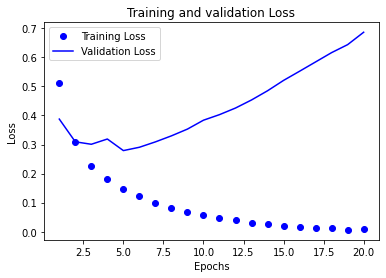

In [ ]:
plt.plot(iteration,train_loss,'bo',label='Training Loss')
plt.plot(iteration,val_loss_value,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

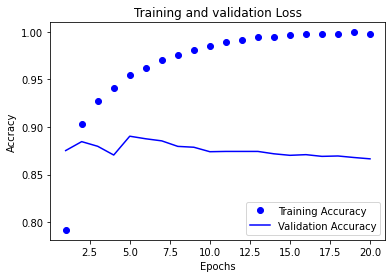

In [ ]:
plt.clf()
train_loss=hist_dict['acc']
val_acc_value=hist_dict['val_acc']

plt.plot(iteration,train_acc,'bo',label='Training Accuracy')
plt.plot(iteration,val_acc_value,'b',label='Validation Accuracy')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend()

Looking at the graph of acc, as you increase no.of epochs, the training acc improves.<br>

Conclusion: For the given imdb data set samples for training are split into 2 to make space for validation samples. It is observed that training accuracy improves with each epoch, however there is no appriciable improvement in validation accuracy.<br>

--> Training loss reduces with each epoch, however, validation loss increases with each epoch.<br>
Thus it can be concluded that the model is overfit and it can be reduced by reducing the complexity of architecture or by applying regularization.

In [ ]:
from keras import regularizers

In [ ]:
model_1=models.Sequential()
model_1.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=(10000,))) #16 neurons in hidden layers
model_1.add(layers.Dense(16,activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid')) 

In [ ]:
model_1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model_1.fit(new_x_training,new_y_training,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1819 - acc: 0.9480 - val_loss: 0.4485 - val_acc: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1245 - acc: 0.9729 - val_loss: 0.4316 - val_acc: 0.8712
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1163 - acc: 0.9786 - val_loss: 0.4380 - val_acc: 0.8698
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1154 - acc: 0.9794 - val_loss: 0.4752 - val_acc: 0.8580
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1158 - acc: 0.9790 - val_loss: 0.4518 - val_acc: 0.8670
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1076 - acc: 0.9836 - val_loss: 0.4713 - val_acc: 0.8635
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1105 - acc: 0.9812 - val_loss: 0.4747 - val_acc: 0.8665
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1081 - a

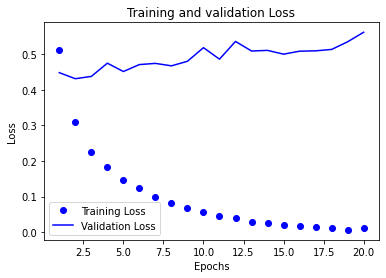

In [ ]:
import matplotlib.pyplot as plt
train_loss=hist_dict['loss']
hist_dict=history.history 
val_loss_value=hist_dict['val_loss']
train_acc=hist_dict['acc']
val_acc_value=hist_dict['val_acc']
iteration=range(1,len(train_acc)+1)


plt.plot(iteration,train_loss,'bo',label='Training Loss')
plt.plot(iteration,val_loss_value,'b',label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

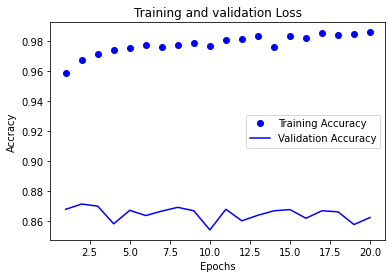

In [ ]:
plt.clf()
train_loss=hist_dict['acc']
val_acc_value=hist_dict['val_acc']
hist_dict=history.history 

plt.plot(iteration,train_acc,'bo',label='Training Accuracy')
plt.plot(iteration,val_acc_value,'b',label='Validation Accuracy')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accracy')
plt.legend()

# **Conclusion**

With each epoch, training loss reduces but validation loss increases, This shows that the model is overfit. To avoid overfitting, regularization parameter of l2 norm is used & results show that training loss reduces with each epoch & validation loss does not increase with each epoch, it gets stabilized within a small the range for the given dataset, validation loss varies with 0.3 and 0.5 with regularization and 0.3 & 0.7 without regularization.